In [11]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [12]:
from qutip import *

In [18]:
kb = 1.380649e-23
e_charge = 1.602e-19
hbar = 1.054e-34
n_points = 1000
g = 0.1e-3                  # Coupling constant
wm = 10e-3                  # Vibrational Mode freq
# wm = g/0.4                # 
Delta = 0                   # Detuning
Q = 100                     # Qualtiy Factor
gamma = wm/Q                # wm/Q
kappa = 0.46e-3
Omega = 0.1e-3
N = 6                       # Number of modes
K = 6
d0 = g/wm
use_rwa=True
use_adv_L=True

T = 4
def set_n_th(T):
    if T:
        n_th = 1/(np.exp(wm*e_charge/(kb*T))-1)
    else:
        n_th=0
    return n_th
n_th = set_n_th(T)
tlist = np.linspace(0,50/kappa,n_points)

In [14]:
# intial state
psi0 = tensor(basis(N,0), basis(K,0))    # System at ground 0 energy state

# operators
a = tensor(destroy(N), qeye(K))
b = tensor(qeye(N), destroy(K))


In [15]:
# Hamiltonian
def get_H():
    if use_rwa:
        H = Delta*a.dag()*a + wm* b.dag()*b - g*(a.dag()*a)*(b + b.dag()) + Omega*(a.dag()+a)
    else:
        H = Delta*a.dag()*a + wm* b.dag()*b + g*(b + b.dag())*(a - a.dag())*(a - a.dag()) + Omega*(a.dag()+a)
    return H


In [16]:
# c_ops
def get_c_ops():
    c_ops = []

    if use_adv_L:
        # cavity relaxation
        rate = kappa/2
        if rate > 0.0:
            c_ops.append(np.sqrt(rate) * a)

        # vibration excitation, if temperature > 0
        rate = gamma * (n_th)/2
        if rate > 0.0:
            c_ops.append(np.sqrt(rate) * (b.dag()-d0*a.dag()*a))

        # vibration relaxation
        rate = gamma * (n_th + 1)/2
        if rate > 0.0:
            c_ops.append(np.sqrt(rate) * (b-d0*a.dag()*a))
        
        rate = 2*gamma*kb/e_charge*T*d0**2/wm
        if rate > 0.0:
            c_ops.append(np.sqrt(rate) * a.dag() * a)
            
    else:
        # cavity relaxation
        rate = kappa/2
        if rate > 0.0:
            c_ops.append(np.sqrt(rate) * a)

        # vibration excitation, if temperature > 0
        rate = gamma * (n_th)/2
        if rate > 0.0:
            c_ops.append(np.sqrt(rate) * b.dag())

        # vibration relaxation
        rate = gamma * (n_th + 1)/2
        if rate > 0.0:
            c_ops.append(np.sqrt(rate) * b)
    return c_ops

In [17]:
# For parameters in USC paper
g_list = [0.1e-3, 2e-3, 4e-3]
T_list = [0,4,77,300]

0
2.5231529552643856e-13
0.2846745402275993
2.117636162404612


C:\Users\debbh\AppData\Local\Temp\ipykernel_12716\1280079381.py:90: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\debbh\AppData\Local\Temp\ipykernel_12716\1280079381.py:96: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig2.show()


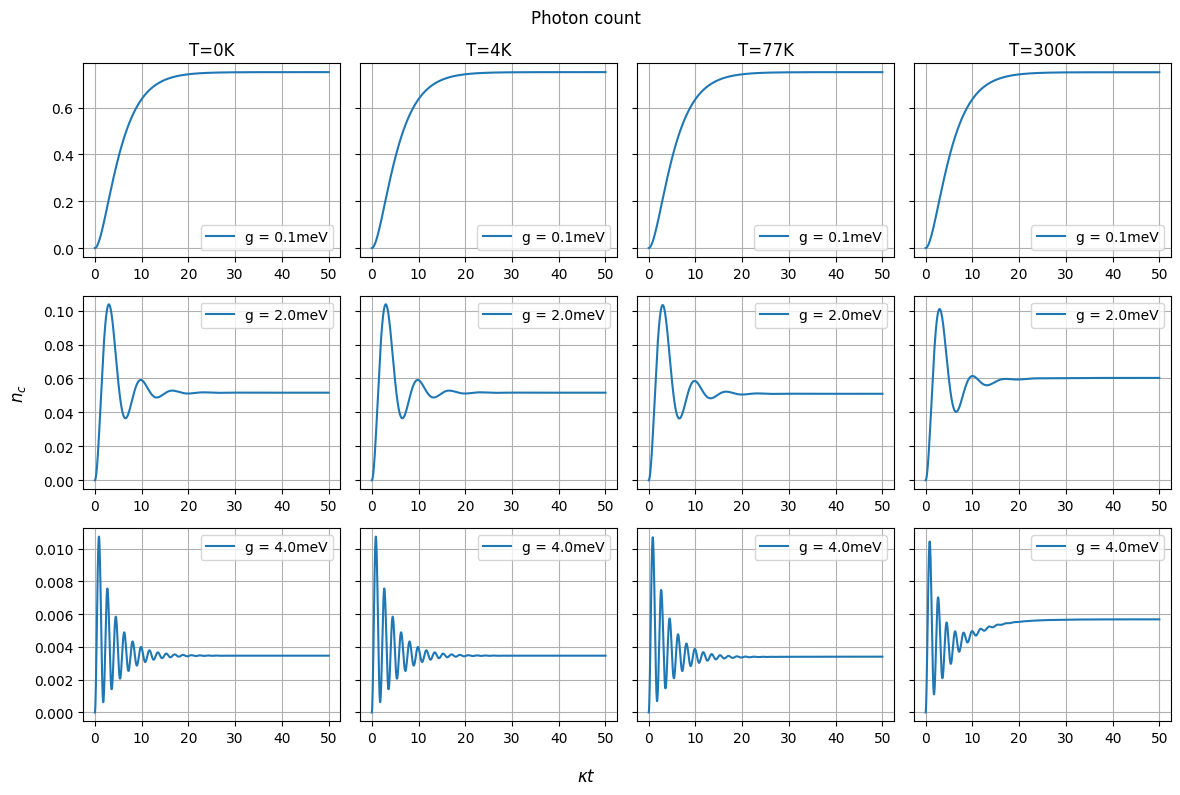

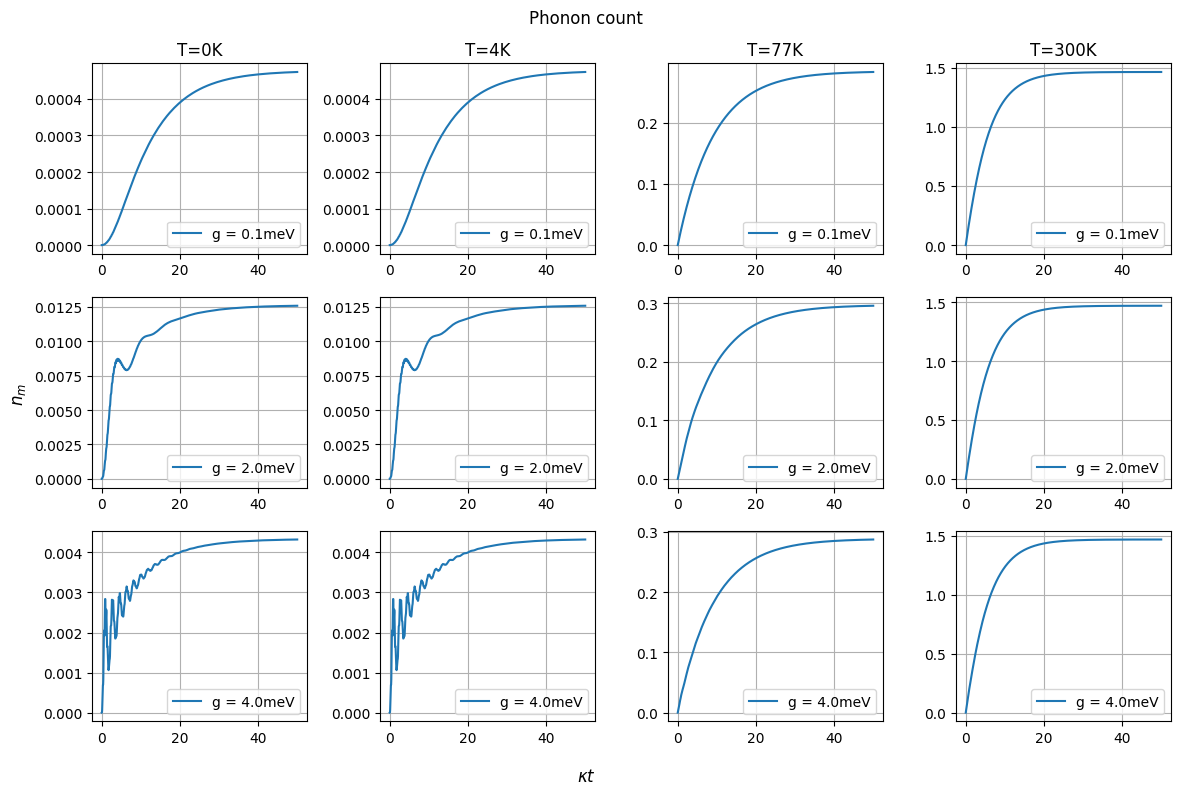

In [21]:
# Plot time evolution of the system as a function of temperature
fig, ax = plt.subplots(3,4,figsize=(12,8),sharey="row")
fig2, ax2 = plt.subplots(3,4,figsize=(12,8))

T = 0
n_th = set_n_th(T)
print(n_th)
outputs = []
for i, g_new in enumerate(g_list):
    g = g_new
    outputs.append(mesolve(get_H(), psi0, tlist, get_c_ops(), [a.dag() * a, b.dag()*b, a.dag(), a]))
for i, output in enumerate(outputs):
    n_c = output.expect[0]
    ax[i][0].plot(tlist*kappa, n_c, label="g = {}meV".format(g_list[i]*1e3))
    ax[i][0].legend()
    ax[i][0].grid()
for i, output in enumerate(outputs):
    n_c = output.expect[1]
    ax2[i][0].plot(tlist*kappa, n_c, label="g = {}meV".format(g_list[i]*1e3))
    ax2[i][0].legend()
    ax2[i][0].grid()

T = 4
n_th = set_n_th(T)
print(n_th)
outputs = []
for i, g_new in enumerate(g_list):
    g = g_new
    outputs.append(mesolve(get_H(), psi0, tlist, get_c_ops(), [a.dag() * a, b.dag()*b, a.dag(), a]))
for i, output in enumerate(outputs):
    n_c = output.expect[0]
    ax[i][1].plot(tlist*kappa, n_c, label="g = {}meV".format(g_list[i]*1e3))
    ax[i][1].legend()
    ax[i][1].grid()
for i, output in enumerate(outputs):
    n_c = output.expect[1]
    ax2[i][1].plot(tlist*kappa, n_c, label="g = {}meV".format(g_list[i]*1e3))
    ax2[i][1].legend()
    ax2[i][1].grid()

T = 77
n_th = set_n_th(T)
print(n_th)
outputs = []
for i, g_new in enumerate(g_list):
    g = g_new
    outputs.append(mesolve(get_H(), psi0, tlist, get_c_ops(), [a.dag() * a, b.dag()*b, a.dag(), a]))
for i, output in enumerate(outputs):
    n_c = output.expect[0]
    ax[i][2].plot(tlist*kappa, n_c, label="g = {}meV".format(g_list[i]*1e3))
    ax[i][2].legend()
    ax[i][2].grid()
for i, output in enumerate(outputs):
    n_c = output.expect[1]
    ax2[i][2].plot(tlist*kappa, n_c, label="g = {}meV".format(g_list[i]*1e3))
    ax2[i][2].legend()
    ax2[i][2].grid()

T = 300
n_th = set_n_th(T)
print(n_th)
outputs = []
for i, g_new in enumerate(g_list):
    g = g_new
    outputs.append(mesolve(get_H(), psi0, tlist, get_c_ops(), [a.dag() * a, b.dag()*b, a.dag(), a]))
for i, output in enumerate(outputs):
    n_c = output.expect[0]
    ax[i][3].plot(tlist*kappa, n_c, label="g = {}meV".format(g_list[i]*1e3))
    ax[i][3].legend()
    ax[i][3].grid()
for i, output in enumerate(outputs):
    n_c = output.expect[1]
    ax2[i][3].plot(tlist*kappa, n_c, label="g = {}meV".format(g_list[i]*1e3))
    ax2[i][3].legend()
    ax2[i][3].grid()

ax[0][0].set_title("T=0K")
ax[0][1].set_title("T=4K")
ax[0][2].set_title("T=77K")
ax[0][3].set_title("T=300K")
ax2[0][0].set_title("T=0K")
ax2[0][1].set_title("T=4K")
ax2[0][2].set_title("T=77K")
ax2[0][3].set_title("T=300K")

fig.suptitle("Plasmon expectation value")
fig.supxlabel("$\kappa t$")
fig.supylabel("$n_c$")
fig.tight_layout()
fig.show()

fig2.suptitle("Phonon expectation value")
fig2.supxlabel("$\kappa t$")
fig2.supylabel("$n_m$")
fig2.tight_layout()
fig2.show()

In [39]:
fine_T_list = np.linspace(0,300,61)
fine_g_list = np.linspace(0, 4e-3,41)
n_c_T = np.zeros((len(fine_g_list),len(fine_T_list)))
n_m_T = np.zeros((len(fine_g_list),len(fine_T_list)))

for idx, g in enumerate(fine_g_list):
    for t_idx, T in enumerate(fine_T_list):
        n_th = set_n_th(T)
        rho_ss = steadystate(get_H(), get_c_ops())
        n_c_T[idx][t_idx] = fexpt = expect(a.dag() * a, rho_ss)
        n_m_T[idx][t_idx] = fexpt = expect(b.dag() * b, rho_ss)

# find expectation value for particle number in steady state

C:\Users\debbh\AppData\Local\Temp\ipykernel_12716\460419143.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


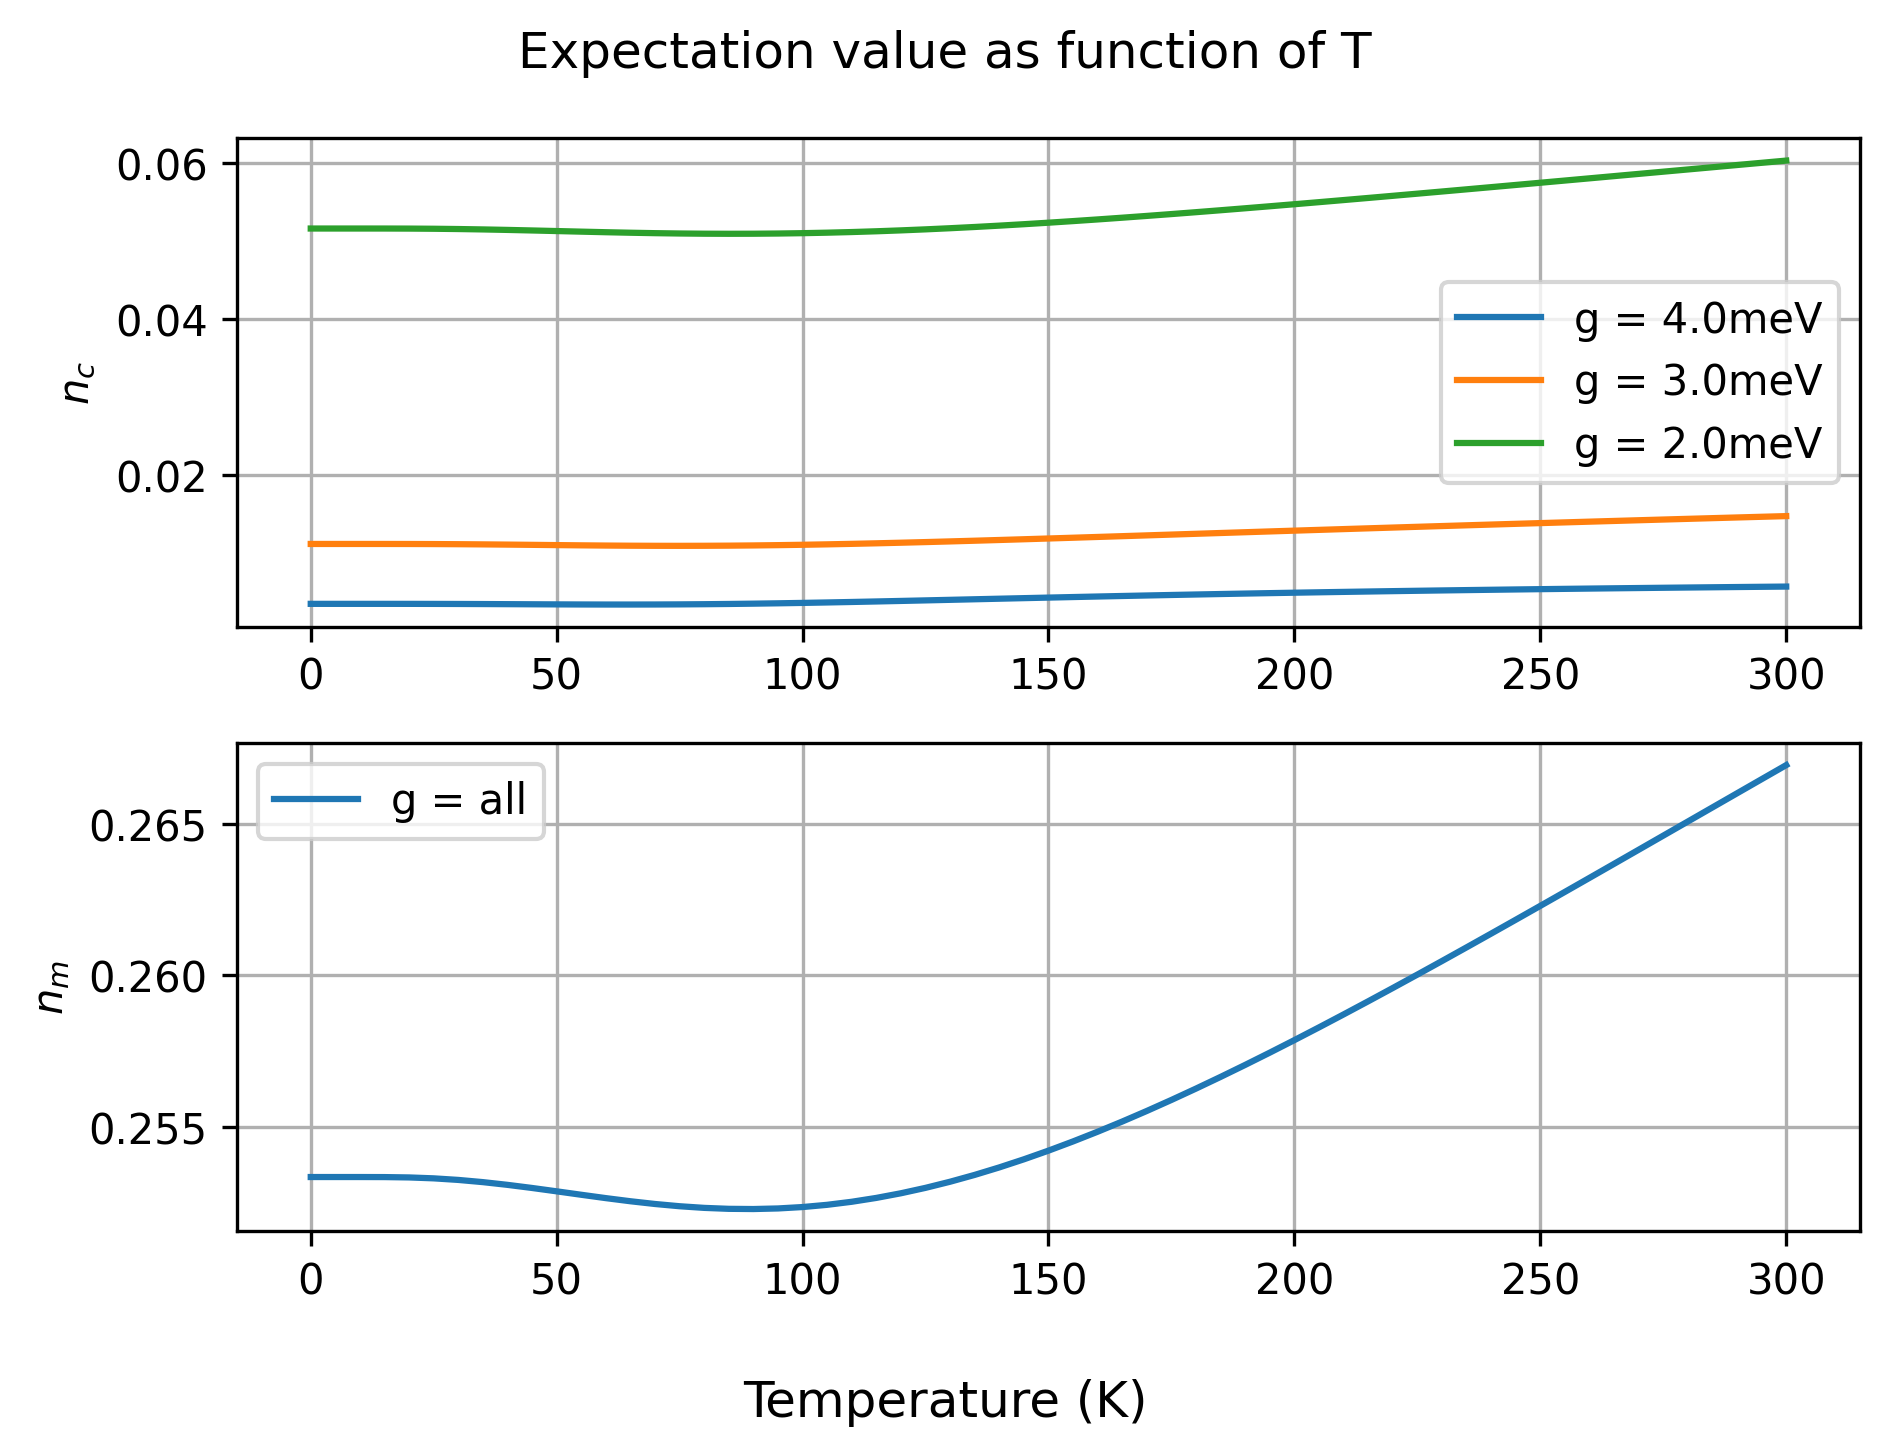

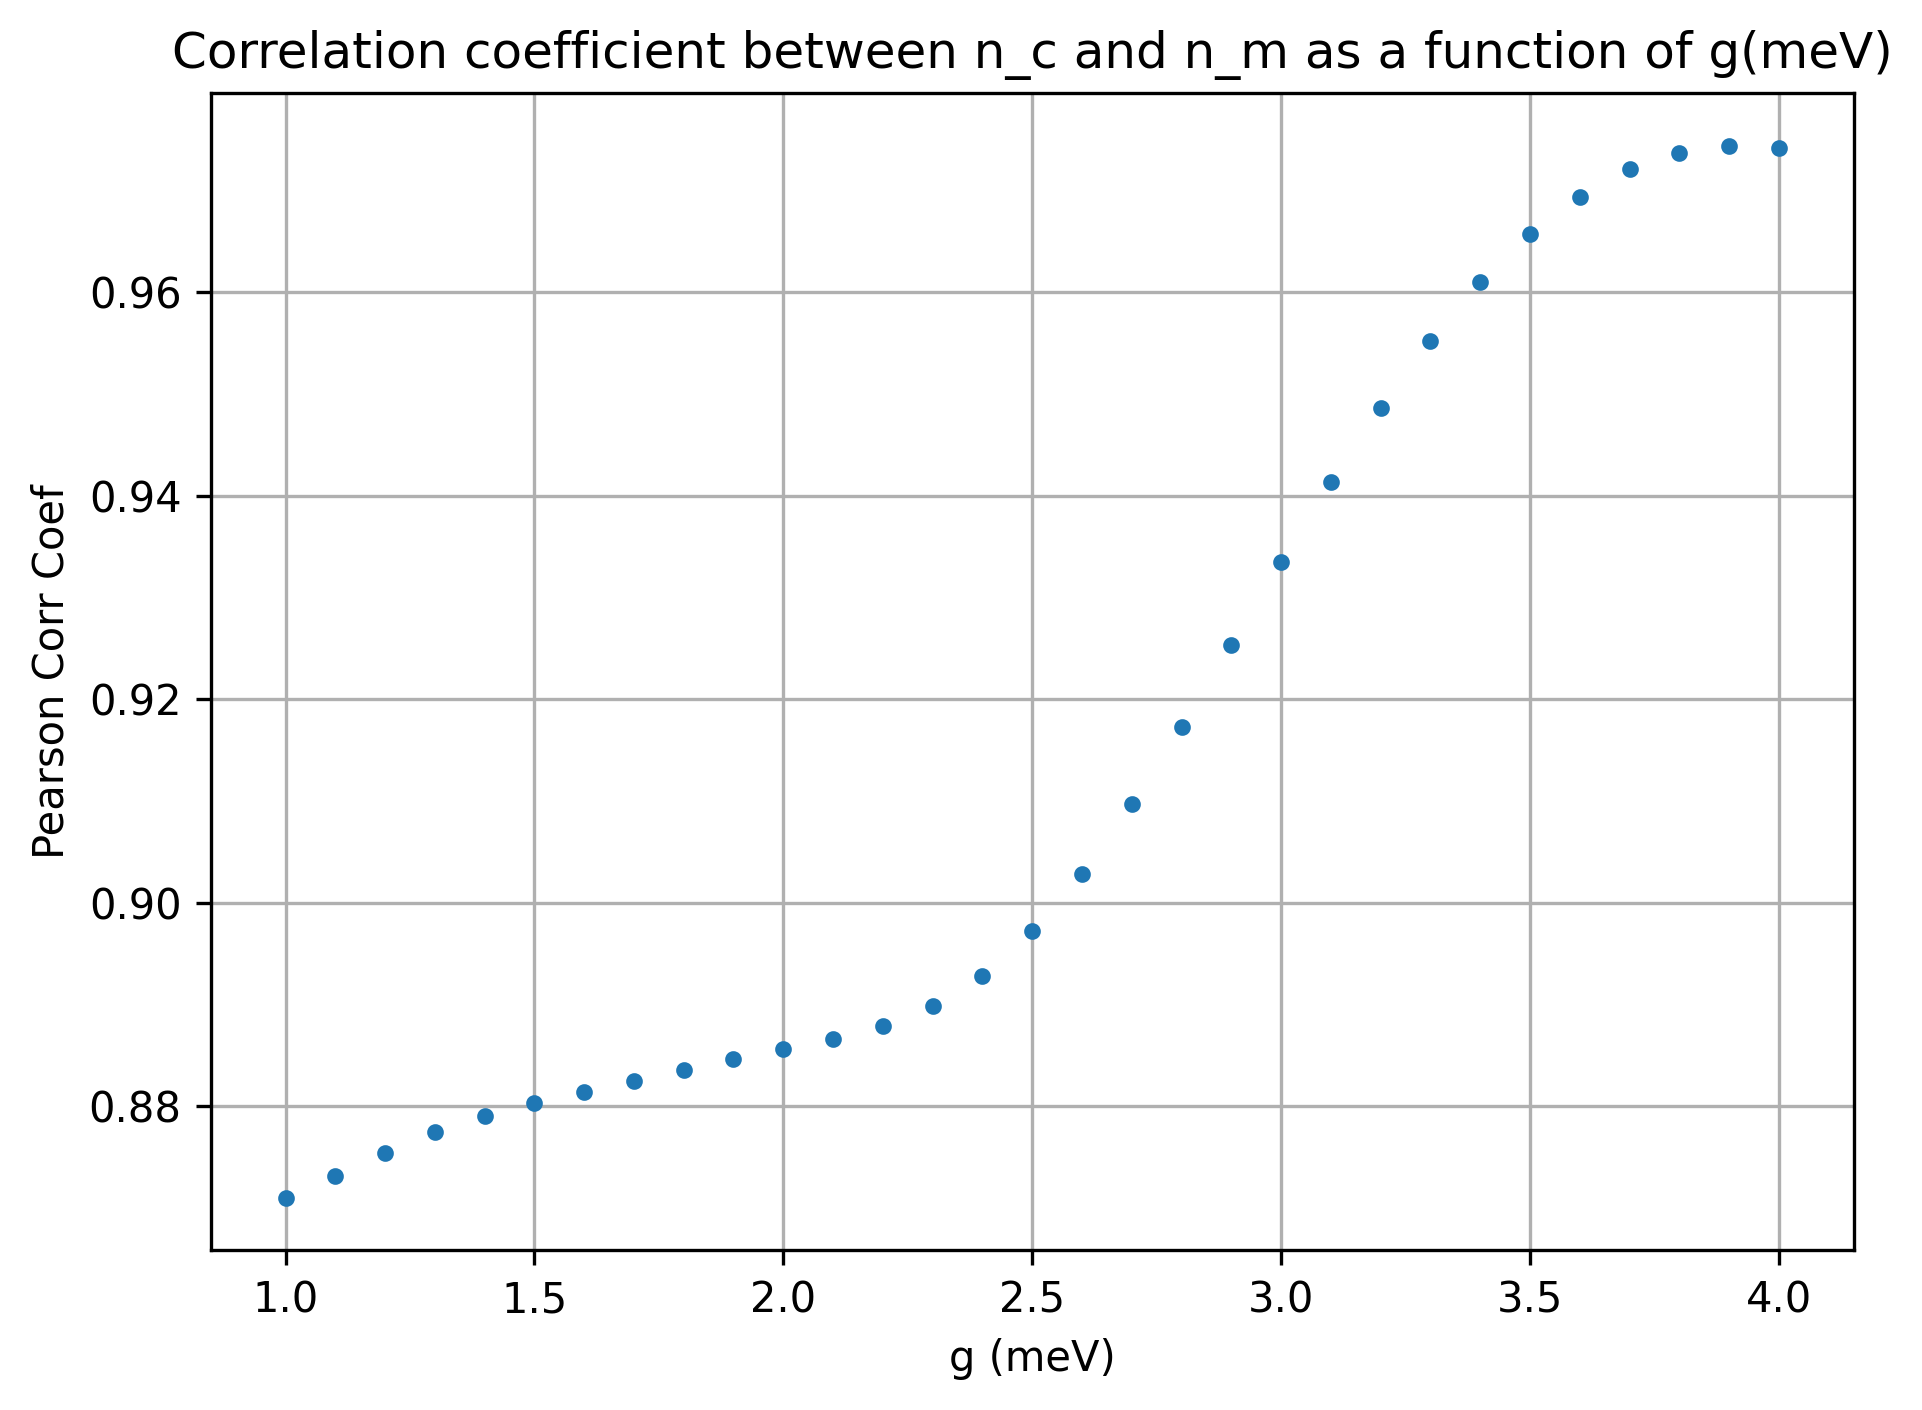

In [130]:
fig, ax = plt.subplots(2,dpi=300)
ax[0].plot(fine_T_list,n_c_T[40][:],label="g = {}meV".format(fine_g_list[40]*1e3))
ax[0].plot(fine_T_list,n_c_T[30][:],label="g = {}meV".format(fine_g_list[30]*1e3))
ax[0].plot(fine_T_list,n_c_T[20][:],label="g = {}meV".format(fine_g_list[20]*1e3))
ax[0].grid()
ax[0].legend()

ax[1].plot(fine_T_list,(n_c_T[-50]),label="g = all")
ax[1].grid()
ax[1].legend()
ax[0].set_ylabel("$n_c$")
ax[1].set_ylabel("$n_m$")
fig.supxlabel("Temperature (K)")
fig.suptitle("Expectation value as function of T")
fig.tight_layout()
fig.show()
fig, ax = plt.subplots(dpi=300)
corr_coefs = [np.corrcoef(n_c_T[i],n_m_T[i])[1,0] for i in range(len(fine_g_list))]
plt.xlabel("g (meV)")
plt.ylabel("Pearson Corr Coef")
plt.title("Correlation coefficient between n_c and n_m as a function of g(meV)")
plt.grid()
plt.tight_layout()
plt.plot(np.array(fine_g_list[10:])*1e3,corr_coefs[10:],'.')
plt.show()

C:\Users\debbh\AppData\Local\Temp\ipykernel_19028\3024212142.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\debbh\AppData\Local\Temp\ipykernel_19028\3024212142.py:38: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


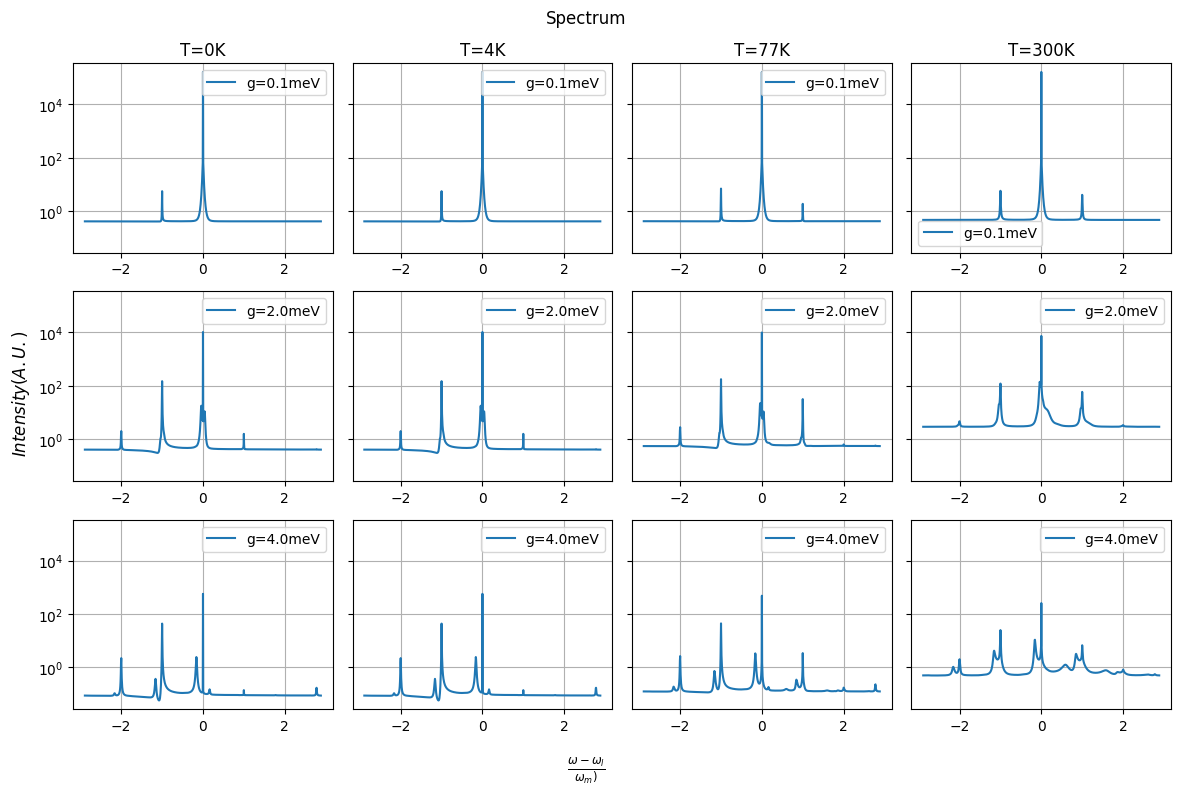

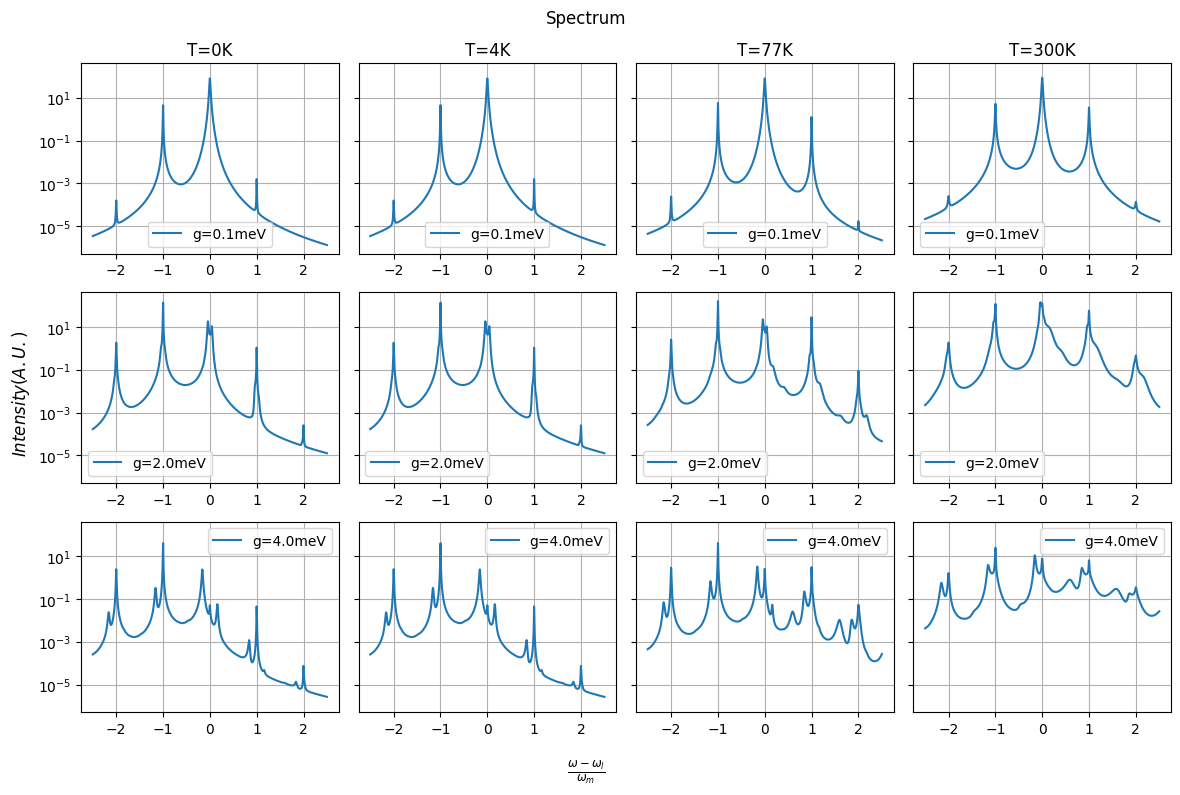

In [39]:
fig, ax = plt.subplots(3,4,figsize=(12,8),sharey=True)
for i, T in enumerate(T_list):
    n_th = set_n_th(T)
    for j, g in enumerate(g_list):
        corr = correlation_2op_1t(get_H(), None, tlist, get_c_ops(), a.dag(), a)
        wlist1, spec1 = spectrum_correlation_fft(tlist, corr)
        ax[j][i].semilogy(wlist1 /wm, spec1,label="g={}meV".format(g*1e3))
        ax[j][i].grid()
        ax[j][i].legend()
ax[0][0].set_title("T=0K")
ax[0][1].set_title("T=4K")
ax[0][2].set_title("T=77K")
ax[0][3].set_title("T=300K")
fig.suptitle("Spectrum")
fig.supxlabel(r"$\frac{\omega-\omega_l}{\omega_m)}$")
fig.supylabel("$Intensity (A.U.)$")
fig.tight_layout()
fig.show()

fig, ax = plt.subplots(3,4,figsize=(12,8),sharey=True)
for i, T in enumerate(T_list):
    n_th = set_n_th(T)
    for j, g in enumerate(g_list):

        wlist2 = np.linspace(-2.5*wm, 2.5*wm, n_points)
        spec2 = spectrum(get_H(), wlist2, get_c_ops(), a.dag(), a)
        ax[j][i].semilogy(wlist2 /wm, spec2,label="g={}meV".format(g*1e3))
        ax[j][i].grid()
        ax[j][i].legend()
ax[0][0].set_title("T=0K")
ax[0][1].set_title("T=4K")
ax[0][2].set_title("T=77K")
ax[0][3].set_title("T=300K")
fig.suptitle("Spectrum")
fig.supxlabel(r"$\frac{\omega-\omega_l}{\omega_m}$")
fig.supylabel("$Intensity (A.U.)$")
fig.tight_layout()
fig.show()

# calculate the power spectrum using spectrum, which internally uses essolve
# to solve for the dynamics (by default)
# wlist2 = np.linspace(-2.5*wm, 2.5*wm, n_points)
# spec2 = spectrum(H, wlist2, c_ops, a.dag(), a)

# # plot the spectra
# fig, ax = plt.subplots(1, 1,figsize=(6,3))
# ax.semilogy(wlist1 /wm, spec1, 'b', lw=2, label='eseries method')
# ax.semilogy(wlist2 /wm, spec2, lw=2, label='me+fft method')
# ax.legend()
# ax.set_xlabel(r'$(\omega - \omega_l)/\omega_m$')
# ax.set_ylabel('Power spectrum')
# ax.set_title('Vacuum Rabi splitting')
# ax.set_xlim(-2.5, 2.5)
# plt.show()

C:\Users\debbh\AppData\Local\Temp\ipykernel_19028\3929818145.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


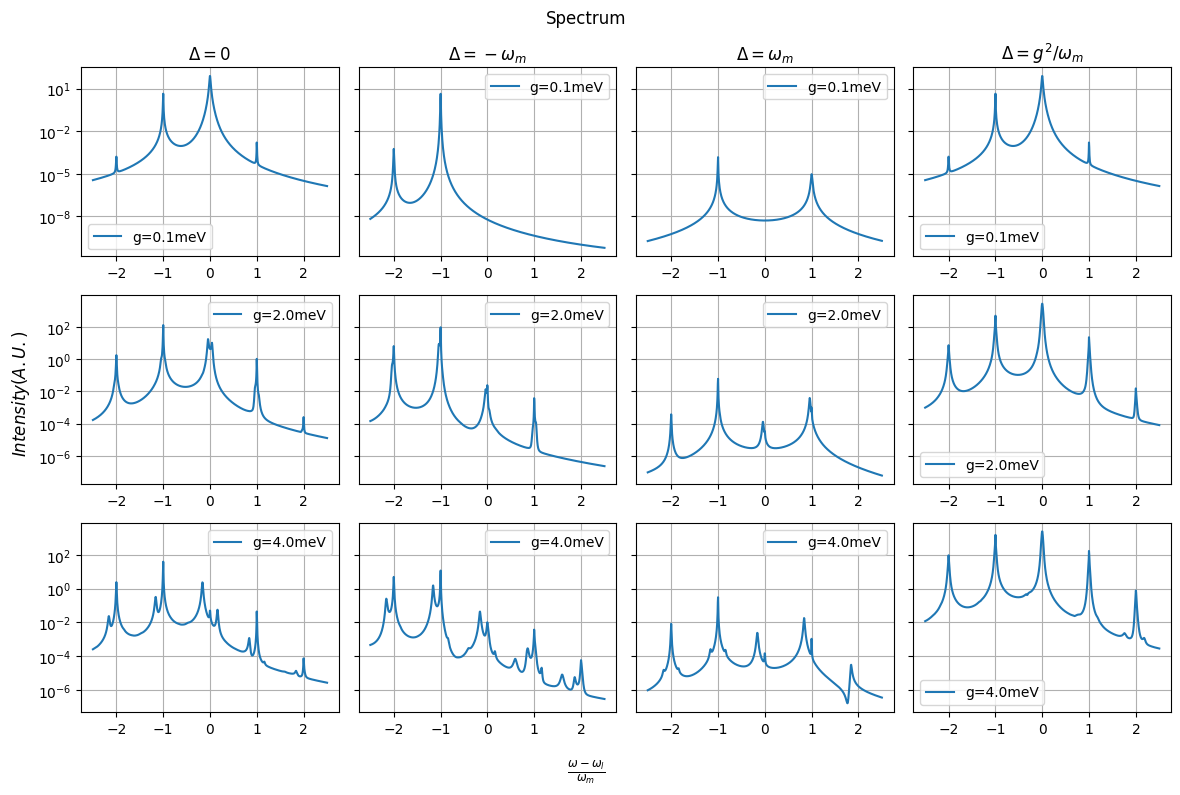

In [35]:
T = 4
n_th = set_n_th(T)
use_adv_L = False
use_rwa = True
D_list = [0,-wm, wm, g**2/wm]
fig, ax = plt.subplots(3,4,figsize=(12,8),sharey="row")
for i, Delta in enumerate(D_list):
    for j, g in enumerate(g_list):
        if i == 3:
            Delta = g**2/wm
        wlist2 = np.linspace(-2.5*wm, 2.5*wm, n_points)
        spec2 = spectrum(get_H(), wlist2, get_c_ops(), a.dag(), a)
        ax[j][i].semilogy(wlist2 /wm, spec2,label="g={}meV".format(g*1e3))
        ax[j][i].grid()
        ax[j][i].legend()
ax[0][0].set_title("$\Delta=0$")
ax[0][1].set_title("$\Delta=-\omega_m$")
ax[0][2].set_title("$\Delta=\omega_m$")
ax[0][3].set_title("$\Delta=g^2/\omega_m$")
fig.suptitle("Spectrum")
fig.supxlabel(r"$\frac{\omega-\omega_l}{\omega_m}$")
fig.supylabel("$Intensity (A.U.)$")
fig.tight_layout()
fig.show()